# Loading Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Crystal Structure Classification/train_dataset.csv")

# **Basic EDA**

In [4]:
df.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,0,0,0.52,0.52,0.93,2.18,2.54,2.214685,2.313698,-1.728214,0.582680,0.000000,0.664286,cubic
1,0,0,1.03,0.86,0.60,1.27,1.90,2.500930,0.000000,-1.768643,0.859135,0.000000,0.428571,cubic
2,2,4,0.92,0.67,0.53,1.83,1.88,2.290644,1.930311,-1.468464,0.849994,4.936558,0.378571,cubic
3,1,5,1.64,1.38,0.62,0.82,2.36,3.025719,1.745600,-1.974429,1.064161,3.977376,0.442857,orthorhombic
4,0,0,0.57,0.57,0.71,2.20,1.30,2.300109,2.027412,-1.622357,0.660190,0.000000,0.507143,cubic


In [5]:
df.columns

Index(['v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)',
       'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ',
       'Lowest distortion'],
      dtype='object')

In [6]:
df.shape

(4165, 14)

In [7]:
df.describe()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
count,4165.000000,4165.000000,4165.00000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,0.882353,1.385114,1.00557,0.841789,0.801999,1.547309,1.599059,2.323011,2.017219,-2.186093,0.781040,1.332182,0.572857
std,1.672111,2.161707,0.33694,0.240549,0.234891,0.447277,0.442961,0.635699,0.555599,0.636470,0.135816,20.804362,0.167778
min,-1.000000,-1.000000,0.27000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,-480.827696,0.192857
25%,-1.000000,-1.000000,0.73000,0.670000,0.630000,1.200000,1.220000,2.294004,1.956808,-2.570036,0.680809,0.000000,0.450000
50%,0.000000,0.000000,0.98000,0.860000,0.760000,1.500000,1.600000,2.422517,2.075849,-2.084214,0.776944,0.000000,0.542857
75%,2.000000,3.000000,1.24000,0.960000,0.940000,1.910000,1.960000,2.582926,2.284156,-1.734643,0.873123,3.892903,0.671429
max,5.000000,5.000000,1.88000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.321062,305.871348,1.192857


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   v(A)               4165 non-null   int64  
 1   v(B)               4165 non-null   int64  
 2   r(AXII)(Å)         4165 non-null   float64
 3   r(AVI)(Å)          4165 non-null   float64
 4   r(BVI)(Å)          4165 non-null   float64
 5   EN(A)              4165 non-null   float64
 6   EN(B)              4165 non-null   float64
 7   l(A-O)(Å)          4165 non-null   float64
 8   l(B-O)(Å)          4165 non-null   float64
 9   ΔENR               4165 non-null   float64
 10  tG                 4165 non-null   float64
 11  τ                  4165 non-null   float64
 12  μ                  4165 non-null   float64
 13  Lowest distortion  4165 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 455.7+ KB


# Separating Input Features and Output Features


In [9]:
# Input/independent variables
X = df.drop('Lowest distortion', axis = 1)   # here we are dropping the Target feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = df['Lowest distortion']             # Output/Dependent variable

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   v(A)        4165 non-null   int64  
 1   v(B)        4165 non-null   int64  
 2   r(AXII)(Å)  4165 non-null   float64
 3   r(AVI)(Å)   4165 non-null   float64
 4   r(BVI)(Å)   4165 non-null   float64
 5   EN(A)       4165 non-null   float64
 6   EN(B)       4165 non-null   float64
 7   l(A-O)(Å)   4165 non-null   float64
 8   l(B-O)(Å)   4165 non-null   float64
 9   ΔENR        4165 non-null   float64
 10  tG          4165 non-null   float64
 11  τ           4165 non-null   float64
 12  μ           4165 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 423.1 KB


In [11]:
pca = PCA()
X_pca = pca.fit_transform(X)

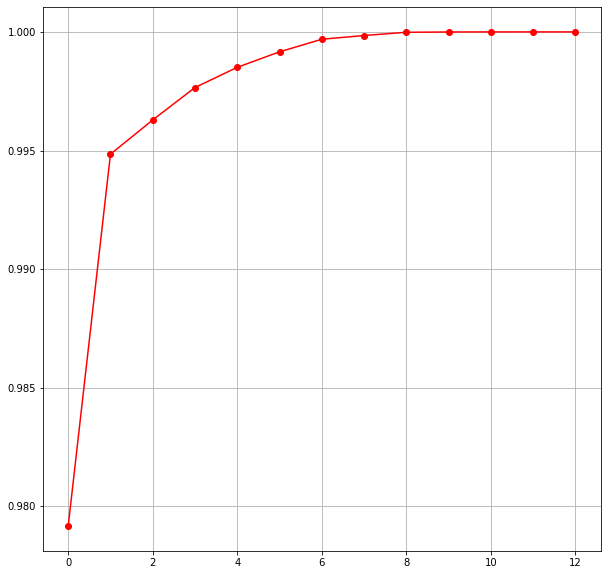

In [12]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [13]:
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
X_train.shape

(2915, 13)

In [16]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[ 1.26884497,  0.75424243,  0.30413093, ...,  1.50969439,
         0.0812582 , -1.70626468],
       [ 0.07533639,  1.67958614,  0.27439617, ...,  0.6915412 ,
         0.15919313, -0.77476144],
       [ 1.26884497,  0.75424243,  0.21492667, ...,  0.22473569,
         0.18775688, -0.18198665],
       ...,
       [ 0.67209068,  1.21691428,  0.92856073, ...,  1.3299934 ,
         0.13903483, -0.85944355],
       [ 0.67209068,  1.21691428,  0.24466142, ...,  0.39140531,
         0.19512937, -0.39369194],
       [-0.5214179 , -0.63377315, -0.23109462, ...,  0.25247618,
        -0.04081958, -0.77476144]])

# Building Model


### Train the model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
print(X_train.shape,y_train.shape)

(2915, 13) (2915,)


# Validate The Model


In [22]:
pred = model.predict(X_test)

## Model Evaluation


In [23]:
from sklearn.metrics import accuracy_score

# Checking the accuracy of the Validation dataset

In [24]:
print('Accuracy score',accuracy_score(pred,y_test))

Accuracy score 0.6256


## Load Test Set


In [25]:
test_data = pd.read_csv(r'/content/drive/MyDrive/Crystal Structure Classification/test_dataset.csv')

In [26]:
test_data.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,2,4,1.19,0.99,0.62,1.22,2.20,2.550861,2.042505,-1.780286,0.906637,4.145754,0.442857
1,2,4,0.90,0.74,0.61,1.65,1.54,2.375479,1.927849,-1.750107,0.809127,5.881989,0.435714
2,2,4,0.79,0.68,0.71,1.60,1.30,2.294004,2.027412,-1.942643,0.733917,18.814711,0.507143
3,3,3,1.08,0.90,0.86,1.22,1.27,2.566449,2.209115,-2.575429,0.775940,9.167449,0.614286
4,-1,-1,0.89,0.72,0.86,1.31,1.27,2.401381,2.209115,-2.400536,0.716493,0.000000,0.614286


## Make Prediction on Test Dataset
Time to make submission!!!

In [27]:
target = model.predict(test_data)

## How to save prediciton results locally via jupyter notebook?


In [28]:
#target = pd.read_csv(r'test_ans.csv')
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["Lowest distortion"]
res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.